In [93]:
import rtree
import geopandas as gpd
import numpy as np
import os, glob

In [15]:
comuni_trentini = gpd.read_file('data' + os.sep + 'comuni_trentini.gpkg')

/home/napo/.local/lib/python3.8/site-packages/geopandas/geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


In [16]:
comuni_trentini = comuni_trentini.to_crs(epsg=4326)

In [17]:
confini_pat = comuni_trentini.dissolve()

In [18]:
confine_trento = comuni_trentini[comuni_trentini.PRO_COM_T=='022205']

In [19]:
comuni5k  = comuni_trentini[comuni_trentini.POPOLAZIONE <= 5000]

In [78]:
os.chdir('data')
geojson_files = glob.glob("*.geojson")
os.chdir("..")
areasdata = "data" + os.sep + "areas30km"
if not os.path.exists(areasdata):
    os.makedirs(areasdata)

In [97]:
def getGeometry(comune_id):
    geocomune = comuni5k[comuni5k.PRO_COM_T == comune_id]
    geocomune30k = gpd.read_file('data' + os.sep + comune_id + ".geojson")
    unionecomune30k = gpd.overlay(geocomune30k, geocomune, how='union').dissolve()
    unionecomune30k['CROSSTN'] = 0
    unionecomune30k['OUTSIDE'] = 0
    area = unionecomune30k.geometry[unionecomune30k.index[0]]
    trento = confine_trento.geometry[confine_trento.index[0]]
    provincia = confini_pat.geometry[confini_pat.index[0]]
    if (area.intersects(trento)):
        unionecomune30k = gpd.overlay(unionecomune30k,confine_trento,how='difference')
        unionecomune30k['CROSSTN'] = 1
    if (area.intersects(provincia)):
        unionecomune30k['OUTSIDE'] = 1
    return(unionecomune30k[['geometry','COMUNE','PRO_COM_T','CROSSTN']])

In [101]:
for geojson in geojson_files:
    comune_id = geojson.replace(".geojson","")
    filesize = os.stat("data" + os.sep + geojson).st_size
    if filesize > 194:
        newgeom = getGeometry(comune_id)
        filename = areasdata + os.sep + comune_id + ".geojson"
        newgeom.to_file(filename,driver="GeoJSON")
    else:
        print(comune_id)

022182
022183
022180


In [74]:
a = getGeometry('022251')

<AxesSubplot:>

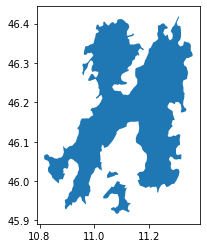

In [75]:
a.plot()

In [76]:
a

,geometry,COMUNE,PRO_COM_T,CROSSTN
0,"MULTIPOLYGON (((10.83093 46.05141, 10.82963 46...",Terre d'Adige,022251,1


In [43]:
a[['geometry','COMUNE','PRO_COM_TN','CROSSTN']].to_file("/tmp/ciapa.shp")

In [28]:
union.to_file("union.geojson",driver="GeoJSON")